# 混同行列

## ライブラリーのインポート

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## データセットのインポート

In [4]:
# データセットをロード
dataset = datasets.load_breast_cancer()

# 一意なクラスラベルを出力
print('特徴量:', dataset.feature_names)
print('クラス:', np.unique(dataset.target))

特徴量: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
クラス: [0 1]


## データセットの確認

In [5]:
pd.set_option('display.max_columns', None)
# データセットの特徴量をDataFrameに変換
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 目標変数をDataFrameに追加
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 説明変数と目的変数に分割

In [6]:
# 相関関係の高い2つの特徴量を抽出
select_features = ['worst perimeter', 'worst concave points']
X = df.loc[:, select_features].values
y = df.loc[:, 'target'].values

## 訓練データとテストデータに分割

In [7]:
# 全体の30%をテストデータととする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y)

## 特徴量のスケーリング

In [8]:
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## 訓練データによるモデルの学習

In [9]:
# 線形SVMのインスタンスを生成
classifier = SVC(kernel='linear', C=1.0, random_state=0)
# 訓練データをモデルに適合させる
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## テストデータで予測

In [10]:
# テストデータで予測を実施
y_pred = classifier.predict(X_test)

## モデルの性能評価

### 混同行列

In [11]:
# テストと予測のデータから混同行列を生成
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 55   9]
 [  7 100]]


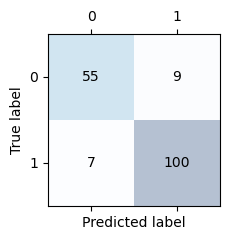

In [14]:
#図のサイズを指定
fig, ax = plt.subplots(figsize=(2.5, 2.5))
# matshow関数からヒートマップを描写
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

## 性能指標

In [17]:
# 正解率、適合率、再現率、F1スコアを出力
print('正解率: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('適合率: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('再現率: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

正解率: 0.906
適合率: 0.917
再現率: 0.935
F1: 0.926


## 自作の性能指標

In [25]:
# 例として正解率の平方を使用する性能指標を定義
def my_custom_score(y_true, y_pred):
    #正解率の計算
    accuracy = accuracy_score(y_true, y_pred)
    # F1スコアの計算
    f1 = f1_score(y_true, y_pred, average='weighted')
    # カスタムスコア（正解率とF1スコアの調和平均）
    custom_score = (accuracy + f1) / 2
    return custom_score

In [26]:
parameters_range = [0.2, 0.4, 0.6, 0.8, 1.0]
parameters = [{'C': parameters_range, 'kernel': ['linear']},
              {'C': parameters_range, 'kernel': ['rbf'], 'gamma': parameters_range}]
my_scorer = make_scorer(my_custom_score)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
# モデルの最良スコアを出力
print("Best Score: {:.2f} %".format(best_accuracy*100))
# 最良スコアとなるパラメーター値を出力
print("Best Parameters:", best_parameters)

Best Score: 95.49 %
Best Parameters: {'C': 0.4, 'gamma': 0.6, 'kernel': 'rbf'}
